In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [69]:
x = tf.Variable(np.linspace(-1, 1, 100))

@tf.function
def f(x):
    return x**2
    
with tf.GradientTape() as tape:
    y = f(x)

dy_dx = tape.gradient(y, x)
dy_dx

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([-2.        , -1.95959596, -1.91919192, -1.87878788, -1.83838384,
       -1.7979798 , -1.75757576, -1.71717172, -1.67676768, -1.63636364,
       -1.5959596 , -1.55555556, -1.51515152, -1.47474747, -1.43434343,
       -1.39393939, -1.35353535, -1.31313131, -1.27272727, -1.23232323,
       -1.19191919, -1.15151515, -1.11111111, -1.07070707, -1.03030303,
       -0.98989899, -0.94949495, -0.90909091, -0.86868687, -0.82828283,
       -0.78787879, -0.74747475, -0.70707071, -0.66666667, -0.62626263,
       -0.58585859, -0.54545455, -0.50505051, -0.46464646, -0.42424242,
       -0.38383838, -0.34343434, -0.3030303 , -0.26262626, -0.22222222,
       -0.18181818, -0.14141414, -0.1010101 , -0.06060606, -0.02020202,
        0.02020202,  0.06060606,  0.1010101 ,  0.14141414,  0.18181818,
        0.22222222,  0.26262626,  0.3030303 ,  0.34343434,  0.38383838,
        0.42424242,  0.46464646,  0.50505051,  0.54545455,  0.58585859,
        0.626262

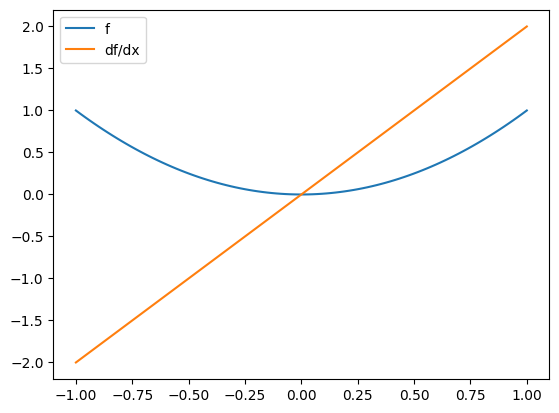

In [70]:
plt.plot(x.numpy(), f(x).numpy(), label="f")
plt.plot(x.numpy(), dy_dx.numpy(), label="df/dx")
plt.legend()

Получение производных из каждой точки

In [71]:
class MegaFun(tf.Module):
    def __init__(self):
        self.w1 = tf.Variable(1.0, dtype=tf.float64)
        self.w2 = tf.Variable(1.0, dtype=tf.float64)
        self.w3 = tf.Variable(1.0, dtype=tf.float64)
          
    def __call__(self, x):
        return self.w1 * x+ self.w2 * x**2 + self.w3
        

In [72]:
fun = MegaFun()

In [73]:
x = tf.constant(np.linspace(-1, 1, 100))
fun = MegaFun()
    
with tf.GradientTape() as tape:
    z = fun(x)

dy_dx = tape.gradient(z, fun.trainable_variables)
dy_dx

(<tf.Tensor: shape=(), dtype=float64, numpy=7.771561172376096e-15>,
 <tf.Tensor: shape=(), dtype=float64, numpy=34.006734006734014>,
 <tf.Tensor: shape=(), dtype=float64, numpy=100.0>)

In [74]:
fun.trainable_variables

(<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>)

In [75]:
class SuperMegaFun(tf.Module):
    def __init__(self):
        self.fun = MegaFun()
        self.b = tf.Variable(0.0, dtype=tf.float64)
   
    def __call__(self, x):
        return self.fun(x) + self.b

In [76]:
x = tf.constant(np.linspace(-1, 1, 100))

g = SuperMegaFun()
with tf.GradientTape() as tape:
    z = g(x)

dy_dx = tape.gradient(z, g.trainable_variables)
dy_dx

(<tf.Tensor: shape=(), dtype=float64, numpy=100.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=7.771561172376096e-15>,
 <tf.Tensor: shape=(), dtype=float64, numpy=34.006734006734014>,
 <tf.Tensor: shape=(), dtype=float64, numpy=100.0>)

In [78]:
x = tf.constant(np.linspace(-1, 1, 100))

g = SuperMegaFun()
with tf.GradientTape() as tape:
    z = g(x)

dy_dx = tape.gradient(z, g.trainable_variables)
print(dy_dx)
try:
    dy_dx2 = tape.gradient(z, g.trainable_variables)
    print(dy_dx2)
except:
    print('error')


(<tf.Tensor: shape=(), dtype=float64, numpy=100.0>, <tf.Tensor: shape=(), dtype=float64, numpy=7.771561172376096e-15>, <tf.Tensor: shape=(), dtype=float64, numpy=34.006734006734014>, <tf.Tensor: shape=(), dtype=float64, numpy=100.0>)
error


In [79]:
x = tf.constant(np.linspace(-1, 1, 100))

g = SuperMegaFun()
with tf.GradientTape(persistent=True) as tape: # <-  Запоминать результат
    z = g(x)

dy_dx = tape.gradient(z, g.trainable_variables)
print(dy_dx)
try:
    dy_dx2 = tape.gradient(z, g.trainable_variables)
    print(dy_dx2)
except:
    print('error')


(<tf.Tensor: shape=(), dtype=float64, numpy=100.0>, <tf.Tensor: shape=(), dtype=float64, numpy=7.771561172376096e-15>, <tf.Tensor: shape=(), dtype=float64, numpy=34.006734006734014>, <tf.Tensor: shape=(), dtype=float64, numpy=100.0>)
(<tf.Tensor: shape=(), dtype=float64, numpy=100.0>, <tf.Tensor: shape=(), dtype=float64, numpy=7.771561172376096e-15>, <tf.Tensor: shape=(), dtype=float64, numpy=34.006734006734014>, <tf.Tensor: shape=(), dtype=float64, numpy=100.0>)


# Обучение

In [93]:
x = tf.constant(np.linspace(-1, 1, 100))
y_tr = 2.0*x+3.0


EPOCHS = 100
alpha = 0.1


class Model(tf.Module):
    def __init__(self):
        self.a = tf.Variable(1.0, dtype=tf.float64)
        self.b = tf.Variable(0.0, dtype=tf.float64)

    def __call__(self, x):
        return self.a*x+self.b 

model = Model()

@tf.function
def loss(y, y_tr):
    return tf.reduce_mean((y-y_tr)**2)

@tf.function
def step(model):
    with tf.GradientTape() as tape: 
        y = model(x)
        delta = loss(y, y_tr)
    delta_a, delta_b = tape.gradient(delta, model.trainable_variables)
    model.a.assign_sub(alpha*delta_a)
    model.b.assign_sub(alpha*delta_b)


for i in range(EPOCHS):
    step(model)

print(model.a.numpy(), model.b.numpy())

1.999127101701888 2.9999999993888893
